In [167]:
from sklearn.datasets import load_digits

## **Q 1.1**
### After loading the dataset, visualize the first few digits datasets

In [66]:
dset = load_digits()
X, y = dset.data, dset.target
print(X.shape, y.shape)

(1797, 64) (1797,)


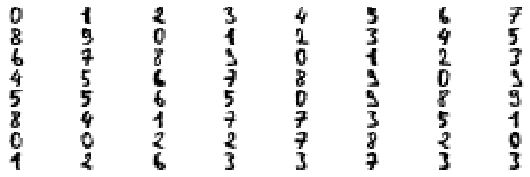

In [67]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 3))
for i, (ax, label) in enumerate(zip(axes, dset.target)):
    for j, a in enumerate(ax):
        image = dset.images[i*8 + j]
        a.set_axis_off()
        a.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

## **Q 1.2**
### Classify the digits using random forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test) 
score = accuracy_score(y_test, y_pred)
print(f'test_score = {score}')

test_score = 0.9796296296296296


In [70]:
for i, (data, pred) in enumerate(zip(y_test, y_pred)):
    print(f'입력 : {data}, 예측 : {pred}')
    if i>10:
        break

입력 : 2, 예측 : 2
입력 : 5, 예측 : 5
입력 : 1, 예측 : 1
입력 : 2, 예측 : 2
입력 : 7, 예측 : 7
입력 : 5, 예측 : 5
입력 : 7, 예측 : 7
입력 : 3, 예측 : 5
입력 : 1, 예측 : 1
입력 : 2, 예측 : 2
입력 : 1, 예측 : 1
입력 : 1, 예측 : 1


prediction : 0


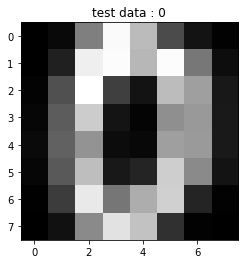

In [71]:
# image를 colab 런타임에 올리고 테스트함
from PIL import Image
import numpy as np

image = Image.open('/content/number0.png')
image = image.resize((8,8))
image = image.convert('L') # 'L': greyscale, '1': 이진화, 'RGB' , 'RGBA', 'CMYK'
plt.imshow(image)
plt.title("test data : 0")

image = np.array(image) # convert image to numpy array
image = image.reshape(8 * 8)    # (64,)

test = [image]
pred = rf.predict(test)
print(f'prediction : {pred[0]}')

## **Q 1.3**
### Show the classification report and discuss the results.

In [72]:
y_test.shape, y_pred.shape

((540,), (540,))

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99        55
           4       0.98      0.98      0.98        54
           5       0.95      1.00      0.97        55
           6       1.00      0.96      0.98        54
           7       0.96      0.96      0.96        54
           8       0.96      0.98      0.97        52
           9       0.98      0.94      0.96        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



[discuss]

0부터 9까지 각 label의 sample개수는 54개 내외로 비슷한 크기를 가지고 있다.

precision의 관점으로보면
5,7,8 의 precision값이 낮은데, 이로부터 모델은 숫자를 손글씨 image를 5,7,8 중 하나로 예측하는 경우가 다른 경우보다 많다는 것을 알 수 있다.

recall의 관점에서
6,7,9의 recall값이 낮은데, 이로부터 randomforest 모델은 6,7,9 숫자에 대한 image를 다른숫자보다 상대적으로 잘 예측하지 못한다고 평가할 수 있다.

f1-score를 통해 종합적으로 평가해보면,
randomforest모델은 f1-score값이 낮은 7,9에 대한 예측 정확도가 떨어진다고 할 수 있다.

## **Q 1.4**
### Plot confusion matrix and discuss the results.

0.9796296296296296


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


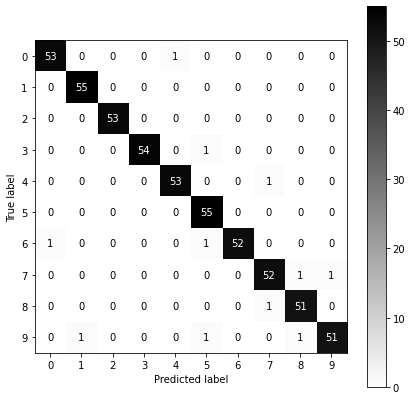

In [77]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print(rf.score(X_test, y_test))
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(rf, X_test, y_test, cmap='gray_r', ax=ax)

[discuss]
숫자 2에 대한 image는 위의 classificaion_report에서 보았던것처럼 precision, recall 모두 1.00 이므로 confusion matrix에서도 다른 label로 예측한 경우가 없이 정확하게 모두 2로 예측한 것을 볼 수 있다.

precision값이 0.95로 가장 낮았던 label=5를 보자. 모델이 5라고 예측한 58개(1+55+1+1)중 실제로 True label=5인 샘플은 55개뿐이므로 precision = 55/58 = 0.948로 반올림시 0.95가 된다.
즉 모델은 3,6,9의 특정 이미지를 5로 분류한 것이다.

다음으로 recall값이 가장 낮았던 label=9를 보자. true label=9인 sample 54개(1+1+1+51)중 모델이 9로 분류한 샘플은 51개뿐이므로 recall = 51/54 = 0.944로 반올림시 0.94가 된다.
즉 모델은 9를 나타내는 손글씨 image중, 특정 image는 9로 분류하지 못하고 1,5,8로 잘못 분류한것이다.

## **Q 1.5**
### Apply PCA to the digits dataset to project them to 2 dimensions and visualize the first two components (2d scatter plot). 
### Discuss the results.


In [79]:
dset.feature_names[:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

(1797, 64)
(1797, 64)


Text(0, 0.5, 'second principal component')

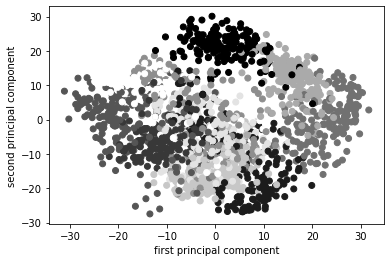

In [105]:
from sklearn.decomposition import PCA

digit = load_digits()
print(digit.data.shape)

pca = PCA()
X_pca = pca.fit_transform(digit.data)
print(X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digit.target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

[discuss]
64개의 feature를 갖고 있던 sample들이 가장 많은 variance를 갖도록 하는 components 두 개를 축으로 하는 직교좌표로 나타낸 것이다.
즉 각각의 sample들은 first component, second component 두 개만을 feature로 갖는다고 볼 수도 있다.

c = digits.target option을 줌으로써 0~9 각 label에 따라 white부터 black까지 marker 색의 농담을 다르게 표현한것도 볼 수 있다.

색깔(label)별로 비슷한 위치에 포진해있는 것을 알 수 있다.

## **Q 1.6**
### A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. 
### This can be determined by looking at the cumulative explained variance ratio as a function of the number of components. Plot the "cumulative explained variance ratio (yaxis)”as a function of “number of component” (x-axis).

Text(0, 0.5, 'explained variance ratio')

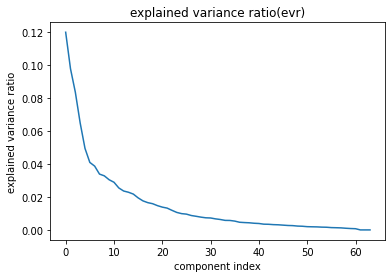

In [120]:
pca = pca_scaled.named_steps['pca']

_, axes = plt.subplots(1)

plt.title("explained variance ratio(evr)")
axes.plot(pca.explained_variance_ratio_)
axes.set_xlabel("component index")
axes.set_ylabel("explained variance ratio")

Text(0, 0.5, 'cumulative explained variance ratio')

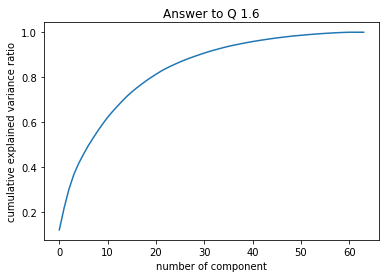

In [119]:
# Answer to Q 1.6
pca = pca_scaled.named_steps['pca']

cumulative_evr = []
sum = 0.0
for evr in pca.explained_variance_ratio_:
    sum += evr
    cumulative_evr.append(sum)
_, axes = plt.subplots(1)

plt.title("Answer to Q 1.6")
axes.plot(cumulative_evr)
axes.set_xlabel("number of component")
axes.set_ylabel("cumulative explained variance ratio")

## **Q 1.7**
### You will apply k-means on the same simple digits data to try to identify similar digits without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don’t have any a prior label information. 
### Apply k-means clustering to the digits dataset with 10 clusters. 

In [124]:
from sklearn.cluster import KMeans

def scatter_tab(x, y, c, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    ax.scatter(x, y, c=plt.cm.tab10(c), **kwargs)

In [126]:
X, y = load_digits(return_X_y=True)
print(X.shape, y.shape)

km = KMeans(n_clusters=10, random_state=123)
km.fit(X)
print(km.cluster_centers_.shape)

(1797, 64) (1797,)
(10, 64)


### The result will be 10 clusters and 64 dimensions. 
### Notice that the cluster centers themselves are 64-dimenstional points, and themselves be interpreted as the “typical” digit within the cluster. 
### Visualize what these cluster centers look like (plot 10 different digits images like below). Hint: reshape kmeans.cluster_centers_ to create the digits images. And discuss the results.

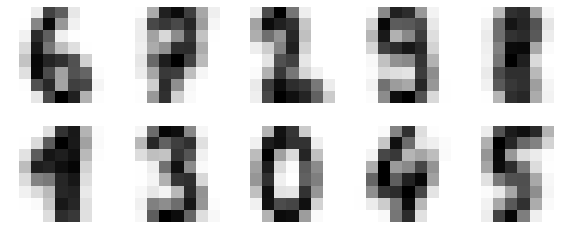

In [140]:
typical_digit = km.cluster_centers_.reshape(10,8,8)

_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes):
    for j, a in enumerate(ax):
        image = typical_digit[i*5 + j]
        a.set_axis_off()
        a.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

## **Q 1.8**
### Because k-means knows nothing about the identity (label) of the cluster, the 0-9 labels may be permuted.
### Fix this by matching each learned cluster label with the true labels and check how accurate our unsupervised clustering is in finding similar digits within the data. 
### Hint: accuracy_score

In [145]:
km.labels_.shape

(1797,)

In [165]:
km.labels_[:100]
cluster_label = [6, 7, 2, 9, 8, 1, 3, 0, 4, 5]
y_pred_km = []
for label in km.labels_:
    y_pred_km.append(cluster_label[label])

print(km.labels_[:10])
print(y_pred_km[:10])

[7 4 4 6 8 3 0 1 4 3]
[0, 8, 8, 3, 4, 9, 6, 7, 8, 9]


In [164]:
y.shape

(1797,)

In [168]:
score = accuracy_score(y, y_pred_km)
print(score)

0.7918753478018921


## **Q 1.9**
### With just a simple k-means algorithm, we can discover the correct groups for [ your accuracy score in 1.8 ] of the input digits. 
### Plot the confusion matrix and check for this and discuss the results.

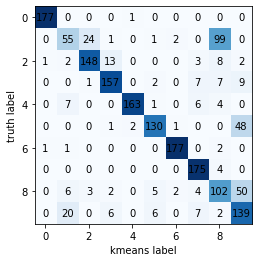

In [174]:
cm = confusion_matrix(y, y_pred_km)

plt.imshow(cm, interpolation='none', cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')

plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

[discuss]

randomforest의 confusion matrix는 대각성분이 모두 진한색깔이었던 반면(recall과 precision모두 높은 값을 가짐), kmeans의 confusion matrix 대각성분의 색이 연한 부분이 보인다. (recall과 precision이 randomforest 모델보다 상대적으로 낮은 값)

두 모델의 confusion matrix와 accuracy_score값을 비교해보았을 때, kmeans로 구축한 모델은 randomforest로 모델을 구축했을때보다 낮은 정확도를 가진다고 할 수 있다.

kmeans로 구축한 위 모델이 8이라고 예측한것중에는 true label이 1인것이 99개, 8인것이 102개, 나머지가 25개이므로 숫자 8에대한 precision값은 0.5를 넘지 못한다.
true label = 1 인 data중 55개밖에 1로 예측하지 못했으므로 숫자 1에대한 recall값도 0.5를 넘지 못한다.
이로부터  위 모델은 1과 8 을 잘 구분하지 못하는 것으로 보인다. 
